In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from pandapower.tdpf.create_jacobian_tdpf import calc_a0_a1_a2_tau, calc_t_ss, calc_t_transient

In [2]:
# conductor data
t_amb = 40
t_max = 90
r_ref_ohm_per_m = 0.1824e-3
conductor_outer_diameter_m = 18.2e-3
v_m_per_s = 0.5
wind_angle_degree = 45
s_w_per_square_meter = 1000
alpha = 0.004
gamma = epsilon = 0.5
mc_joule_per_m_k = 525

In [3]:
a0, a1, a2, tau = calc_a0_a1_a2_tau(t_amb=t_amb, t_max=t_max, r_ref_ohm_per_m=r_ref_ohm_per_m,
                                    conductor_outer_diameter_m=conductor_outer_diameter_m, mc_joule_per_m_k=mc_joule_per_m_k,
                                    v_m_per_s=v_m_per_s, wind_angle_degree=wind_angle_degree, s_w_per_square_meter=s_w_per_square_meter)

In [4]:
t_start = calc_t_ss(250, a0, a1, a2)
t_start

60.7204449490497

In [5]:
calc_t_transient(0, 1e9, 250, a0, a1, a2, tau)

60.7204449490497

In [6]:
t = [calc_t_transient(t_start, t_min * 60, 450, a0, a1, a2, tau) for t_min in range(41)]

(0.0, 120.0)

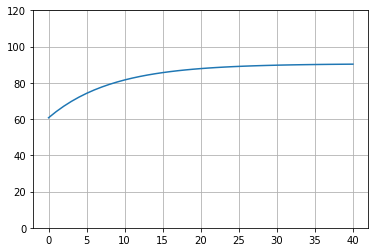

In [7]:
ax=plt.subplot()
ax.plot(t)
ax.grid(True)
ax.set_ylim([0, 120])

In [8]:
tau / 60

8.310994534185484